# ミューチュアルインフォメーションによる特徴量の選択

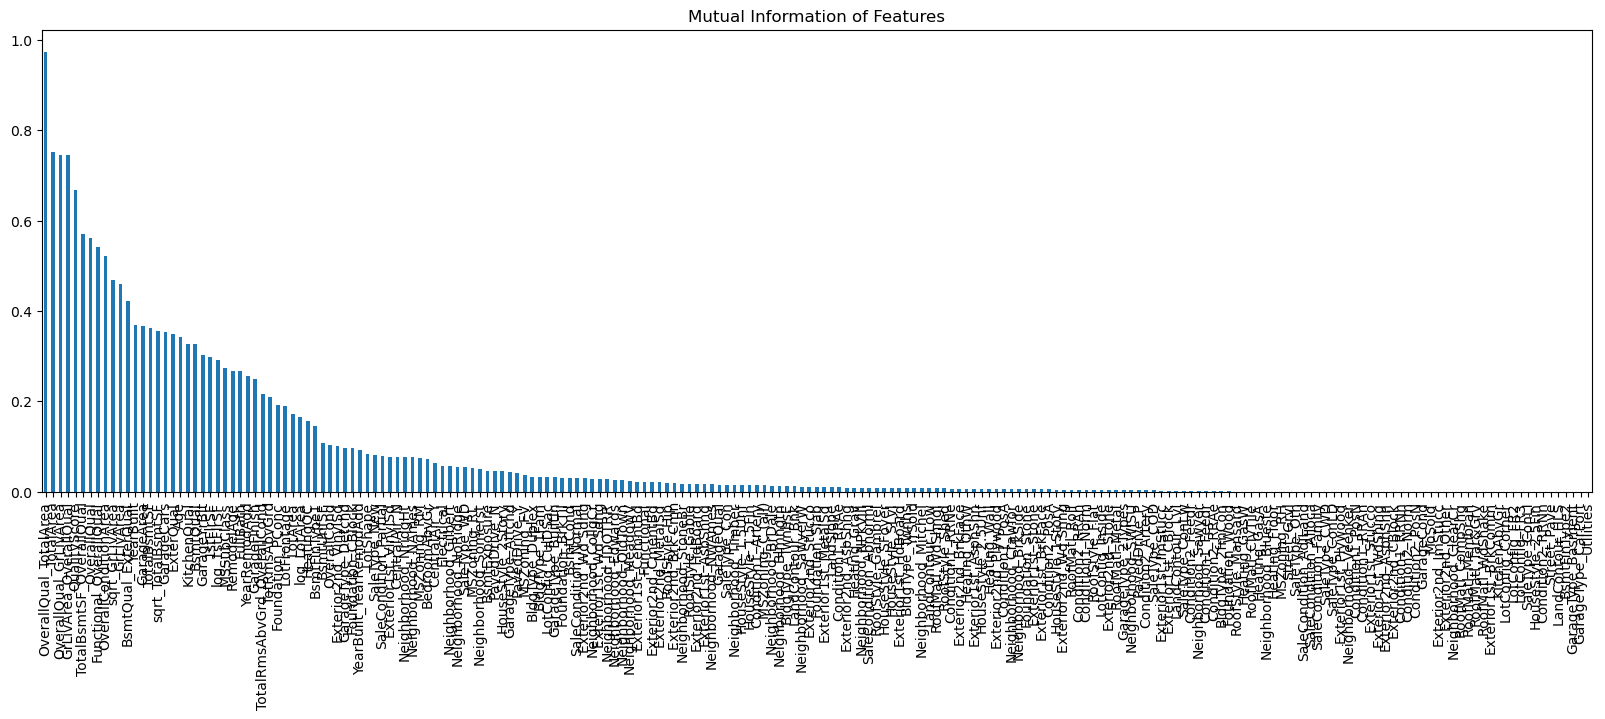

Selected top 20% features after removing duplicates: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GrLivArea_OverallQual', 'TotalBsmtSF_OverallQual', 'TotalArea', 'QualityScore', 'Age', 'RemodelAge', 'OverallConditionArea', 'TotalRmsAbvGrd_OverallCond', 'Functional_OverallQual', 'log_LotArea', 'sqrt_GrLivArea', 'OverallQual_GrLivArea', 'log_1stFlrSF', 'sqrt_TotalBsmtSF', 'OverallQual_TotalArea', 'BsmtQual_ExterQual', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc', 'GarageType_Detchd']
Selected features data saved to /Users/hayakawakazue/Downloads/house_price/train/selected_train_data.csv


In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_encoded.csv'
data = pd.read_csv(data_path)

# 無限値をNaNに置き換え
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN値を中央値で補完
for column in data.columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].median(), inplace=True)

# IDカラムのドロップ
data.drop(columns=['Id'], inplace=True, errors='ignore')

# 特徴量とターゲットの分離
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# ミューチュアルインフォメーションを計算
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# ミューチュアルインフォメーションの可視化
plt.figure(figsize=(20, 6))
mi_series.plot.bar()
plt.title('Mutual Information of Features')
plt.show()

# 上位20%の特徴量を選択
selector = SelectPercentile(mutual_info_regression, percentile=20)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# 選択された特徴量の重複削除
selected_features = pd.Series(selected_features).drop_duplicates().tolist()

print("Selected top 20% features after removing duplicates:", selected_features)

# 選択された特徴量を使用してデータをフィルタリング
X_selected = X[selected_features].copy()
# SalePriceをX_selectedに追加
selected_data = pd.concat([X_selected, y], axis=1)

# データの保存
selected_features_path = '/Users/hayakawakazue/Downloads/house_price/train/selected_train_data.csv'
selected_data.to_csv(selected_features_path, index=False)
print(f"Selected features data saved to {selected_features_path}")


# スケーリングを行う

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/selected_train_data.csv'
data = pd.read_csv(data_path)

# 目的変数を分離（ここでは 'SalePrice' が目的変数）
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# スケーラーの初期化と適用
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# スケーリングされた特徴量をDataFrameに変換
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 目的変数を再結合
X_scaled_df['SalePrice'] = y.values

# 結果のデータフレームの保存
scaled_data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
X_scaled_df.to_csv(scaled_data_path, index=False)

# スケーラーの保存
scaler_path = '/Users/hayakawakazue/Downloads/house_price/model/scaler.joblib'
joblib.dump(scaler, scaler_path)

print(f"Scaled and filtered data saved to {scaled_data_path}")
print(f"Scaler saved to {scaler_path}")


Scaled and filtered data saved to /Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv
Scaler saved to /Users/hayakawakazue/Downloads/house_price/model/scaler.joblib


# 特徴量の選択と保存

In [16]:
import pandas as pd
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
train_df = pd.read_csv(data_path)

# 上位20%の特徴量をリスト化（リストが正しいことを確認して下さい選択と保存をします。）
selected_features = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
    'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 
    'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GrLivArea_OverallQual', 
    'TotalBsmtSF_OverallQual', 'TotalArea', 'QualityScore', 'Age', 'RemodelAge', 
    'OverallConditionArea', 'TotalRmsAbvGrd_OverallCond', 'Functional_OverallQual', 
    'log_LotArea', 'sqrt_GrLivArea', 'OverallQual_GrLivArea', 'log_1stFlrSF', 'sqrt_TotalBsmtSF', 
    'OverallQual_TotalArea', 'BsmtQual_ExterQual', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 
    'Foundation_PConc', 'GarageType_Detchd'
]

# 目的変数
target_variable = 'SalePrice'

# 上位20%の特徴量と目的変数を含むデータフレームを作成する
selected_df = train_df[selected_features + [target_variable]]

# データの保存
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
selected_features_path = os.path.join(save_dir, 'selected_features.csv')
selected_df.to_csv(selected_features_path, index=False)
print(f"selected_features saved to {selected_features_path}")


selected_features saved to /Users/hayakawakazue/Downloads/house_price/train/selected_features.csv


# 相関行列を確認する

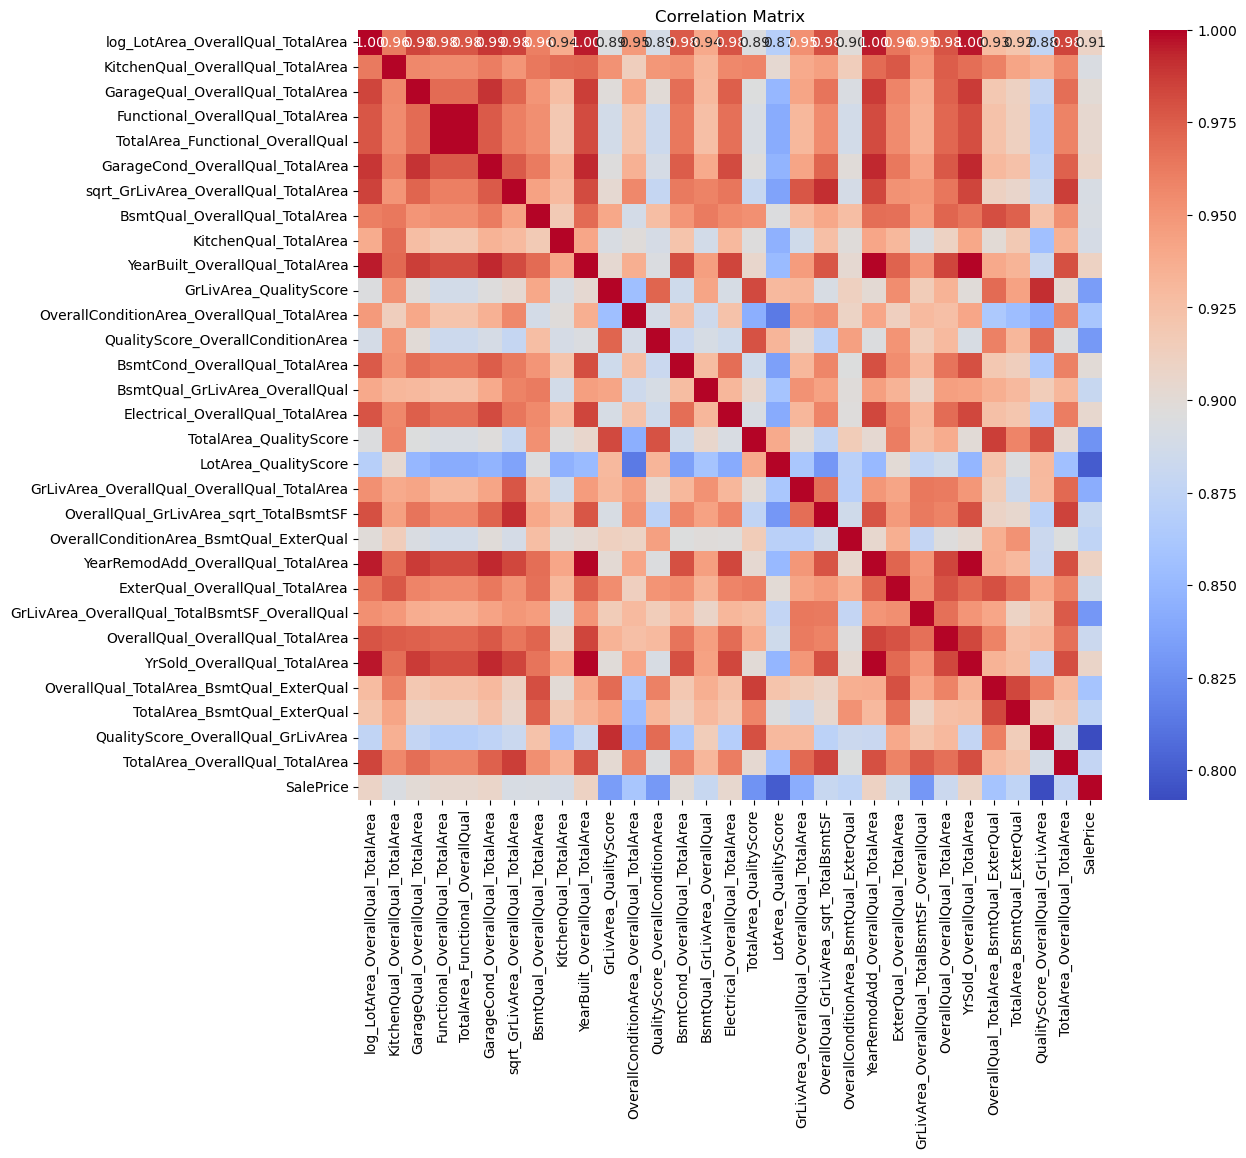

Remaining features after removing highly correlated ones: ['log_LotArea_OverallQual_TotalArea', 'KitchenQual_OverallQual_TotalArea', 'Functional_OverallQual_TotalArea', 'BsmtQual_OverallQual_TotalArea', 'KitchenQual_TotalArea', 'GrLivArea_QualityScore', 'OverallConditionArea_OverallQual_TotalArea', 'QualityScore_OverallConditionArea', 'BsmtQual_GrLivArea_OverallQual', 'LotArea_QualityScore', 'GrLivArea_OverallQual_OverallQual_TotalArea', 'OverallConditionArea_BsmtQual_ExterQual', 'ExterQual_OverallQual_TotalArea', 'GrLivArea_OverallQual_TotalBsmtSF_OverallQual', 'SalePrice']
Reduced features data saved to /Users/hayakawakazue/Downloads/house_price/train/reduced_top_30_features.csv


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/selected_features.csv'
data = pd.read_csv(data_path)

# データフレームのカラム名にスペースが含まれている可能性があるため、スペースをアンダースコアに変換
data.columns = data.columns.str.replace(' ', '_')
selected_features = [feature.replace(' ', '_') for feature in selected_features]

# 相関行列の計算
corr_matrix = data.corr()

# ヒートマップで相関行列を可視化
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# 相関が高い特徴量ペアを削除
threshold = 0.98
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            colname = corr_matrix.columns[j]
            if colname not in to_drop:
                to_drop.add(colname)

# 削除する特徴量をリストとして表示
# print("Features to drop due to high correlation:", to_drop)

# 高い相関の特徴量をデータフレームから削除
reduced_data = data.drop(columns=to_drop)

# 残った特徴量を表示
remaining_features = list(reduced_data.columns)
print("Remaining features after removing highly correlated ones:", remaining_features)

# 結果のデータフレームを保存
reduced_data_path = '/Users/hayakawakazue/Downloads/house_price/train/reduced_top_30_features.csv'
reduced_data.to_csv(reduced_data_path, index=False)
print(f"Reduced features data saved to {reduced_data_path}")


# モデルが重視している特徴量の確認

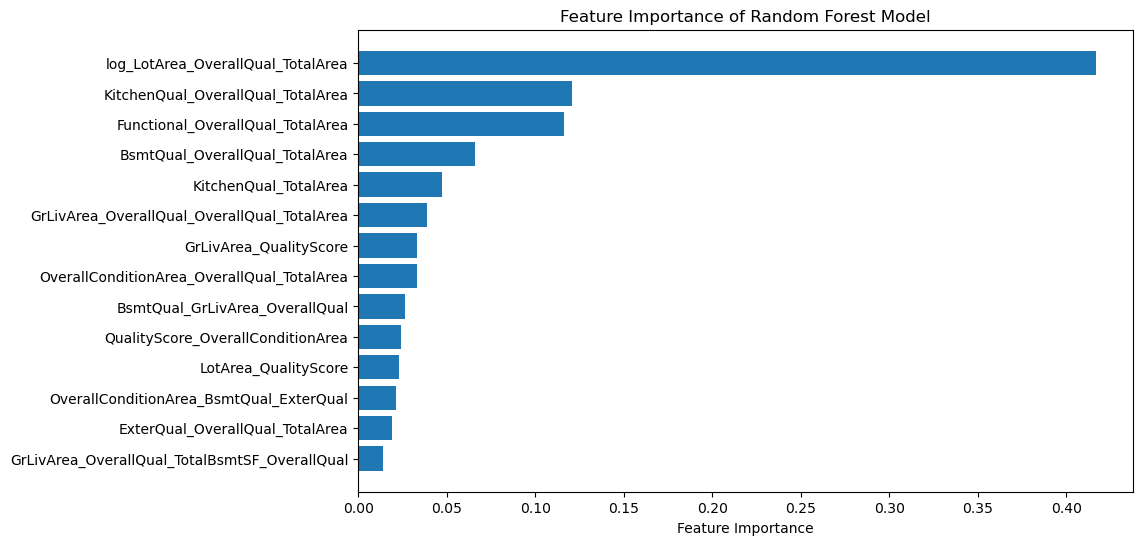

Cross-Validation MAE Scores: [15790.92980057 19277.35095849 16047.12413512 16576.388131
 15018.27394134]
Mean MAE: 16542.0134
Standard Deviation of MAE: 1456.9885
Mean Absolute Error (MAE): 15388.6062
Mean Squared Error (MSE): 483143159.9290
R-squared (R2): 0.9012
Root Mean Squared Error (RMSE): 21980.5177
Filtered features data saved to /Users/hayakawakazue/Downloads/house_price/train/selected_data.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/reduced_top_30_features.csv'
data = pd.read_csv(data_path)

# 選択された特徴量
selected_features = [
    'log_LotArea_OverallQual_TotalArea', 'KitchenQual_OverallQual_TotalArea', 
    'Functional_OverallQual_TotalArea', 'BsmtQual_OverallQual_TotalArea', 
    'KitchenQual_TotalArea', 'GrLivArea_QualityScore', 'OverallConditionArea_OverallQual_TotalArea',
    'QualityScore_OverallConditionArea', 'BsmtQual_GrLivArea_OverallQual', 
    'LotArea_QualityScore', 'GrLivArea_OverallQual_OverallQual_TotalArea', 
    'OverallConditionArea_BsmtQual_ExterQual', 'ExterQual_OverallQual_TotalArea', 
    'GrLivArea_OverallQual_TotalBsmtSF_OverallQual'
]

# データフレームのカラム名にスペースが含まれている可能性があるため、スペースをアンダースコアに変換
data.columns = data.columns.str.replace(' ', '_')
selected_features = [feature.replace(' ', '_') for feature in selected_features]

# 特徴量と目的変数を分ける
X = data[selected_features]
y = data['SalePrice']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの作成と訓練
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 特徴量の重要度を取得
feature_importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(30)

# 特徴量の重要度を表示
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# クロスバリデーションでの評価
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae_scores = -cv_scores

# クロスバリデーションの結果を表示
print(f"Cross-Validation MAE Scores: {cv_mae_scores}")
print(f"Mean MAE: {cv_mae_scores.mean():.4f}")
print(f"Standard Deviation of MAE: {cv_mae_scores.std():.4f}")

# テストデータを使った予測
y_pred = model.predict(X_test)

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# 結果の表示
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# データの保存
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
selected_data_path = os.path.join(save_dir, 'selected_data.csv')
X.to_csv(selected_data_path, index=False)
print(f"Filtered features data saved to {selected_data_path}")
